In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import *
from requests import get
from zipfile import ZipFile
from io import BytesIO
%matplotlib inline

# Gather

In [82]:
#Downloading the fordgobike data
folder_name_of_csvs = 'trip_data_files'
makedirs(folder_name_of_csvs)
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_name_of_csvs))
for month in range(1,12):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)


In [83]:
#CSVs downloaded from ford website and below for loop to concatenate them in one dataframe
list_csvs = []
for file_name in listdir('trip_data_files'):
    list_csvs.append(pd.read_csv('trip_data_files'+'/'+file_name))
df = pd.concat(list_csvs)
df.to_csv('data.csv')

In [84]:
df = pd.read_csv('data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Assess

In [86]:
df.head()

,Unnamed: 0,Unnamed: 0.1,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,0,0.0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,1,1.0,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,2,2.0,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,3,3.0,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,4,4.0,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


In [87]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252058 entries, 0 to 2252057
Data columns (total 18 columns):
Unnamed: 0                 2252058 non-null int64
Unnamed: 0.1               519700 non-null float64
bike_id                    2252058 non-null int64
bike_share_for_all_trip    1732358 non-null object
duration_sec               2252058 non-null int64
end_station_id             2240479 non-null float64
end_station_latitude       2252058 non-null float64
end_station_longitude      2252058 non-null float64
end_station_name           2240479 non-null object
end_time                   2252058 non-null object
member_birth_year          2079810 non-null float64
member_gender              2080240 non-null object
start_station_id           2240479 non-null float64
start_station_latitude     2252058 non-null float64
start_station_longitude    2252058 non-null float64
start_station_name         2240479 non-null object
start_time                 2252058 non-null object
user_type       

## Quality Issues

1) Some Columns have null values

2) End_time and Start_time columns are object not date

3) Some rows have null values

## Tidiness Issues

1) Dates are all in one column (hour, day, month & year).

2) Birthyear column is provided. However, age column will be much better and easier in analysis and communication.

3) Trip Duration in seconds is provided but it will be much better if it is in Hours

# Clean

In [88]:
#Making Copy of the data frame
df_clean = df.copy()

## Some Columns have null values

### Define

Will drop columns that have too much null values

### Code

In [89]:
df_clean = df_clean.drop(['Unnamed: 0', 'Unnamed: 0.1', 'bike_share_for_all_trip'], axis=1)

### Test

In [90]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252058 entries, 0 to 2252057
Data columns (total 15 columns):
bike_id                    2252058 non-null int64
duration_sec               2252058 non-null int64
end_station_id             2240479 non-null float64
end_station_latitude       2252058 non-null float64
end_station_longitude      2252058 non-null float64
end_station_name           2240479 non-null object
end_time                   2252058 non-null object
member_birth_year          2079810 non-null float64
member_gender              2080240 non-null object
start_station_id           2240479 non-null float64
start_station_latitude     2252058 non-null float64
start_station_longitude    2252058 non-null float64
start_station_name         2240479 non-null object
start_time                 2252058 non-null object
user_type                  2252058 non-null object
dtypes: float64(7), int64(2), object(6)
memory usage: 257.7+ MB


## Correcting columns data types

### Define

End_time & Start_time columns are objects should be changed to date

### Code

In [91]:
df_clean.end_time = pd.to_datetime(df_clean.end_time)
df_clean.start_time = pd.to_datetime(df_clean.start_time)

### Test

In [92]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252058 entries, 0 to 2252057
Data columns (total 15 columns):
bike_id                    2252058 non-null int64
duration_sec               2252058 non-null int64
end_station_id             2240479 non-null float64
end_station_latitude       2252058 non-null float64
end_station_longitude      2252058 non-null float64
end_station_name           2240479 non-null object
end_time                   2252058 non-null datetime64[ns]
member_birth_year          2079810 non-null float64
member_gender              2080240 non-null object
start_station_id           2240479 non-null float64
start_station_latitude     2252058 non-null float64
start_station_longitude    2252058 non-null float64
start_station_name         2240479 non-null object
start_time                 2252058 non-null datetime64[ns]
user_type                  2252058 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(4)
memory usage: 257.7+ MB


## Null values in rows

### Define

Some rows have null values and should be dropped to not damage the integrety of our data

### Code

In [93]:
df_clean = df_clean.dropna()

### Test

In [94]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068553 entries, 0 to 2252057
Data columns (total 15 columns):
bike_id                    2068553 non-null int64
duration_sec               2068553 non-null int64
end_station_id             2068553 non-null float64
end_station_latitude       2068553 non-null float64
end_station_longitude      2068553 non-null float64
end_station_name           2068553 non-null object
end_time                   2068553 non-null datetime64[ns]
member_birth_year          2068553 non-null float64
member_gender              2068553 non-null object
start_station_id           2068553 non-null float64
start_station_latitude     2068553 non-null float64
start_station_longitude    2068553 non-null float64
start_station_name         2068553 non-null object
start_time                 2068553 non-null datetime64[ns]
user_type                  2068553 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(4)
memory usage: 252.5+ MB


## All dates are in one column

### Define

All aspects of date& time are in one column, better be seperated

### Code

In [95]:
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['start_time_day'] = df_clean['start_time'].dt.day.astype(int)
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%a')

In [96]:
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['start_time_day'] = df_clean['start_time'].dt.day.astype(int)
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%a')

### Test

In [97]:
df_clean.head()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,start_time_hour,start_time_day,start_time_month,start_time_weekday
0,96,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer,16,31,December,Sun
1,88,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer,15,31,December,Sun
4,3167,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber,14,31,December,Sun
6,3539,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.619,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.422,Customer,23,31,December,Sun
12,2311,2183,24.0,37.789677,-122.390428,Spear St at Folsom St,2018-01-01 00:29:18.743,1990.0,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-12-31 23:52:55.581,Subscriber,23,31,December,Sun


## Age column to be added 

### Define

Age column will be very usefull in our insights

### Code

In [98]:
df_clean['age'] = 2019 - df_clean.member_birth_year

### Test

In [99]:
df_clean.head()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,start_time_hour,start_time_day,start_time_month,start_time_weekday,age
0,96,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer,16,31,December,Sun,32.0
1,88,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer,15,31,December,Sun,54.0
4,3167,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber,14,31,December,Sun,22.0
6,3539,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.619,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.422,Customer,23,31,December,Sun,28.0
12,2311,2183,24.0,37.789677,-122.390428,Spear St at Folsom St,2018-01-01 00:29:18.743,1990.0,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-12-31 23:52:55.581,Subscriber,23,31,December,Sun,29.0


## Trip duration in Hours to be added

### Define

It's better to have trip duration in hours to improve our insights

### Code

In [100]:
df_clean['duration_hour'] = (df_clean.duration_sec/(60*60))

### Test

In [101]:
df_clean.head()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,...,start_station_longitude,start_station_name,start_time,user_type,start_time_hour,start_time_day,start_time_month,start_time_weekday,age,duration_hour
0,96,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987.0,Male,74.0,...,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer,16,31,December,Sun,32.0,22.252778
1,88,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,1965.0,Female,284.0,...,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer,15,31,December,Sun,54.0,21.888889
4,3167,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997.0,Female,239.0,...,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber,14,31,December,Sun,22.0,12.111944
6,3539,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.619,1991.0,Female,259.0,...,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.422,Customer,23,31,December,Sun,28.0,1.251944
12,2311,2183,24.0,37.789677,-122.390428,Spear St at Folsom St,2018-01-01 00:29:18.743,1990.0,Male,67.0,...,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-12-31 23:52:55.581,Subscriber,23,31,December,Sun,29.0,0.606389


# Exploratory Charts

### What is the age of the bikers 

(array([  6.53811000e+05,   9.17840000e+05,   3.50088000e+05,
          1.25864000e+05,   1.78450000e+04,   1.28100000e+03,
          3.46000000e+02,   3.05000000e+02,   1.14100000e+03,
          3.20000000e+01]),
 array([  19. ,   30.9,   42.8,   54.7,   66.6,   78.5,   90.4,  102.3,
         114.2,  126.1,  138. ]),
 <a list of 10 Patch objects>)

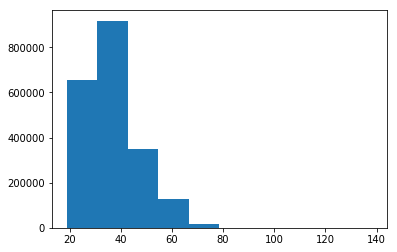

In [102]:
## Bikers Age
plt.hist(data = df_clean, x='age')

### Finding

Most of the bikers are between 20 and 60 years old, the rest are outliers and will be removed

### Code

In [103]:
df_clean = df_clean[df_clean.age <= 60]

### Test

(array([  97919.,  279728.,  394785.,  377978.,  280564.,  176593.,
         137754.,  111101.,   81579.,   72487.]),
 array([ 19. ,  23.1,  27.2,  31.3,  35.4,  39.5,  43.6,  47.7,  51.8,
         55.9,  60. ]),
 <a list of 10 Patch objects>)

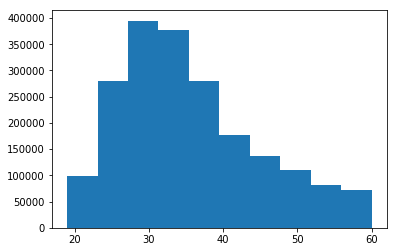

In [104]:
plt.hist(data = df_clean, x='age')

### Which type of customers is using the service more

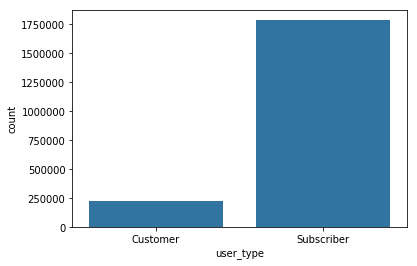

In [108]:
base_color = sns.color_palette()[0]
sns.countplot(data = df_clean, x = 'user_type',color = base_color)

### Finding

Subscribers are using the service way more than customers

### Which gender is using the service more

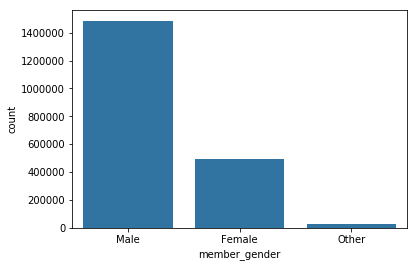

In [109]:
base_color = sns.color_palette()[0]
sns.countplot(data = df_clean, x = 'member_gender', color=base_color)

### Finding 

Majority of the bikers are Males

### When are users are using the service the most during the week

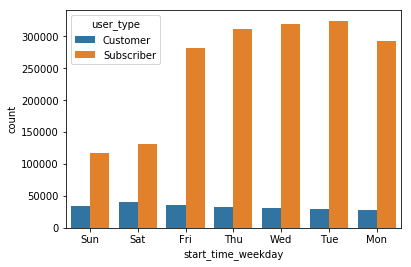

In [110]:
sns.countplot(data = df_clean, x = 'start_time_weekday', hue = 'user_type')

### Finding

As we found before most of the customers are subscribers and here it looks like they are using the service daily in normal working days Mondays to Fridays. On the other hand, Customers trend is almost the same daily.

### Which month of the year has the highest trrafic

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

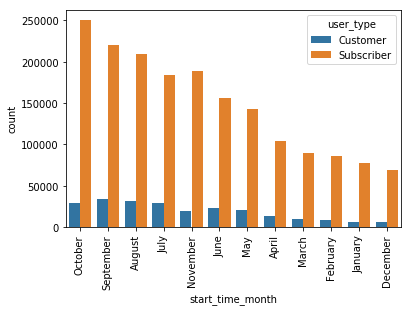

In [111]:
the_order = df_clean.start_time_month.value_counts().index
sns.countplot(data = df_clean, x = 'start_time_month', hue = 'user_type', order=the_order)
plt.xticks(rotation=90)

### Finding 

October is the highest month in trrafic, Also the lowest in trrafic is December

Maybe it has something to do with the weather, as it starts to increase from December to October.

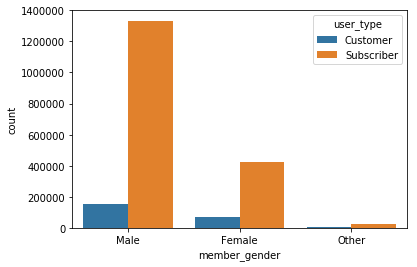

In [112]:
sns.countplot(data = df_clean, x = 'member_gender', hue = 'user_type')

As expected from the gender graph earlier, there is a big difference between the number of male subscribers and female subscribers. Howevere, the difference bwteen female and male customers is not that much which may suggest that most of the customers are couples trying the service together maybe for fun or exploration.

### Which Gender rides bikes for longer time and how old are they

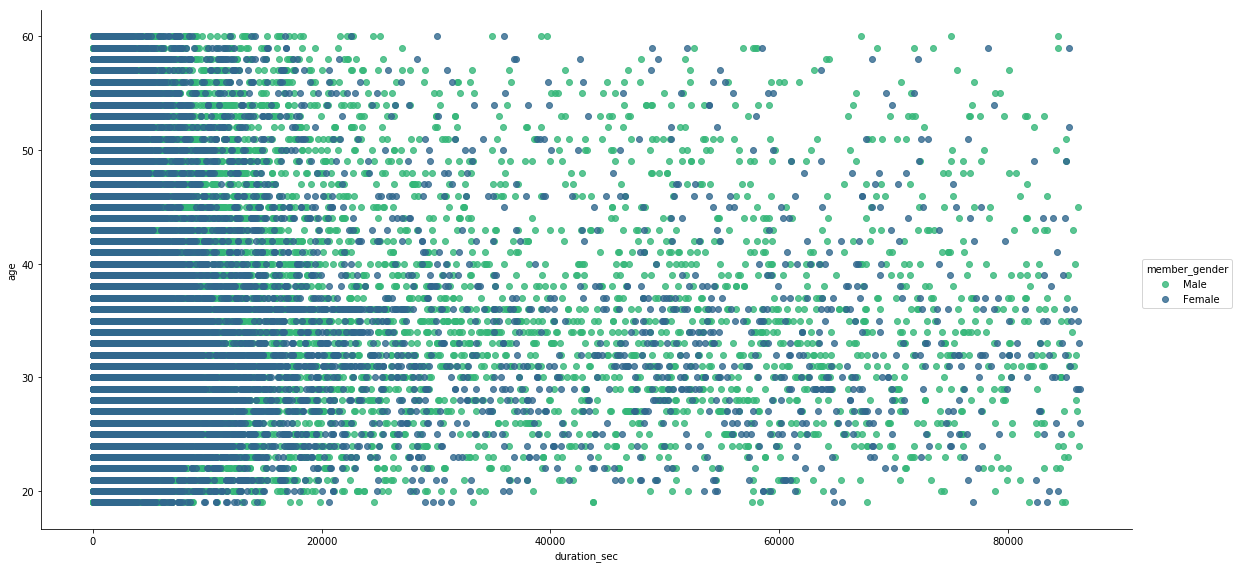

In [58]:
g = sns.FacetGrid(data = df_clean, hue = 'member_gender', hue_order = ['Male', 'Female'], size=8, aspect=2, palette='viridis_r')
g.map(sns.regplot, 'duration_sec', 'age', x_jitter=0.5, fit_reg = False);
g.add_legend()

### Finding 

On average, males and females are in their 30s and both mostly use the bikes between 0 to 30K seconds (around 8 hours)

### Which type pf customers rides bikes for longer time and how old are they

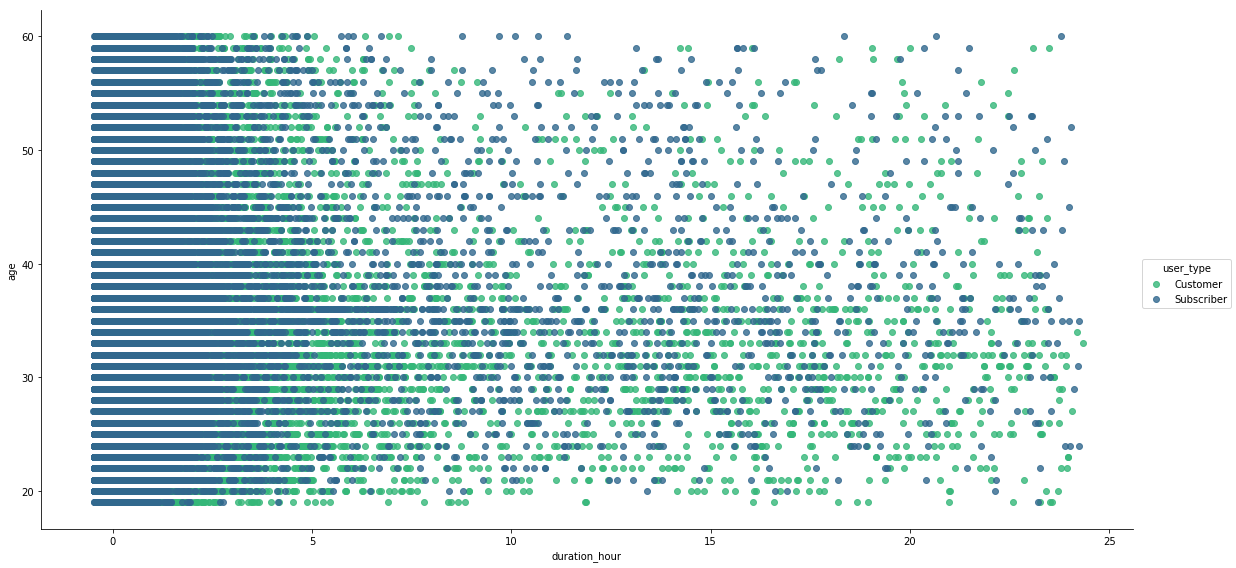

In [74]:
g = sns.FacetGrid(data = df_clean, hue = 'user_type', hue_order = ['Customer', 'Subscriber'], size=8, aspect=2, 
                  palette='viridis_r')
g.map(sns.regplot, 'duration_hour', 'age', x_jitter=0.5, fit_reg = False);
g.add_legend()

### Finding

Most of the users (customers & Subscribers) use the service for about 5 hours, except for users in their 30s they use for longer time around 10 hours

### Saving our clean data fram to a new excel sheet

In [75]:
df_clean.to_csv('bikes_final.csv')